### **Read the codebook**

When you work with datasets like the NSFG, it is important to read the documentation carefully. If you interpret a variable incorrectly, you can generate nonsense results and never realize it. So before you start coding, you'll need to get familiar with the NSFG codebook, which describes every variable.

Here is the documentation from the NSFG codebook for "BIRTHWGT_OZ1":

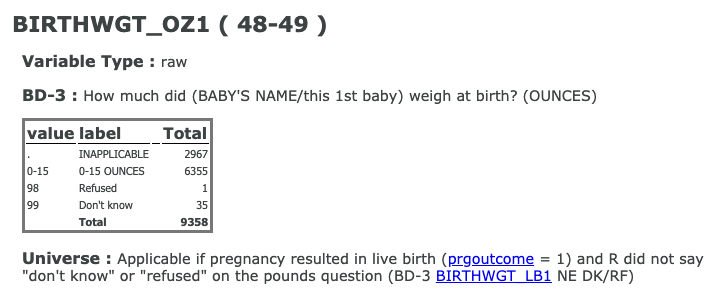

How many respondents refused to answer this question?

The answer is 1.

### **Exploring the NSFG data**

To get the number of rows and columns in a DataFrame, you can read its `shape` attribute.

To get the column names, you can read the `columns` attribute. The result is an Index, which is a Pandas data structure that is similar to a list. Let's begin exploring the NSFG data! It has been pre-loaded for you into a DataFrame called `nsfg`.

* Calculate the number of rows and columns in the DataFrame `nsfg`.
* Display the names of the columns in `nsfg`.
* Select the column `'birthwgt_oz1'` and assign it to a new variable called `ounces`.
* Display the first 5 elements of `ounces`

In [8]:
import pandas as pd

nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')
# Display the number of rows and columns
print(nsfg.shape, "\n")

# Display the names of the columns
print(nsfg.columns, '\n')

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())

(9358, 10) 

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object') 

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


# **ใช้ value_counts() และ sort_index() เพื่อดูการกระจายขของข้อมูล**

In [2]:
import pandas as pd

nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')
pounds = nsfg['birthwgt_lb1']
ounces = nsfg['birthwgt_oz1']
pounds.value_counts()

7.0     2146
6.0     1666
8.0     1168
5.0      586
9.0      363
4.0      196
99.0      94
10.0      82
3.0       67
2.0       47
1.0       34
11.0      17
12.0       7
0.0        6
14.0       2
13.0       2
98.0       1
17.0       1
Name: birthwgt_lb1, dtype: int64

`.value_counts()` จะเรียงตามความถี่ของค่าที่เกิดขึ้นของข้อมูล ถ้าอยากทราบการกระจายตัวของข้อมูล ต้องใช้ `.sort_index()` หรือทำไงก็ได้ให้ข้อมูลเรียงตามลำดับจากน้อยไปมาก

ปล. จาก databook ด้านบน 98 คือไม่ตอบ และ 99 คือไม่รู้ จึงจัดเป็นข้อมูลที่หายไป

ปล 2. จริงๆแล้วข้อมูลชุดนี้ มีค่า `NaN` ด้วย แต่วิธี `.value_counts() `มันไม่แสดงค่า `NaN`

In [3]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

# **Replace missing values ที่ไม่ได้อยู่ในรูปของ NaN หรือ N/A**

ถ้าให้ค่า missing values มาเป็นตัวเลขแบบนี้ ต้องใช้ `.replace()` ในการแก้ไขค่า missing


In [4]:
import numpy as np

pounds.replace([98, 99], np.nan, inplace=True)
pounds.mean()


6.703286384976526

### **Validate a variable**
In the NSFG dataset, the variable `'outcome'` encodes the outcome of each pregnancy as shown below:



```
value	label
1	    Live birth
2	    Induced abortion
3	    Stillbirth
4	    Miscarriage
5	    Ectopic pregnancy
6	    Current pregnancy
```
How many pregnancies in this dataset ended with a live birth?

In [8]:
import pandas as pd

nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')
nsfg["outcome"].value_counts().loc[1]

6489

### **Clean a variable**

In the NSFG dataset, the variable `'nbrnaliv'` records the number of babies born alive at the end of a pregnancy.

If you use `.value_counts()` to view the responses, you'll see that the value `8` appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with `np.nan`. 

* In the `'nbrnaliv'` column, replace the value `8`, in place, with the special value `NaN`.
* Confirm that the value `8` no longer appears in this column by printing the values and their frequencies.

In [9]:
import pandas as pd
import numpy as np

nsfg = pd.read_hdf("nsfg.hdf5", "nsfg")

print(nsfg['nbrnaliv'].value_counts(), "\n")

# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64 

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


### **Compute a variable**

For each pregnancy in the NSFG dataset, the variable `'agecon'` encodes the respondent's age at conception, and `'agepreg'` the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.

* Select `'agecon'` and `'agepreg'`, divide them by `100`, and assign them to the local variables `agecon` and `agepreg`.
* Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, `agepreg` will be larger than `agecon`.
* Use `.describe()` to compute the mean duration and other summary statistics.

In [10]:
import pandas as pd
import numpy as np

nsfg = pd.read_hdf("nsfg.hdf5", "nsfg")

# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


# **ใช้ ฮิสโตแกรม เพื่อดูการกระจายตัวของข้อมูล**

* หน้าตากราฟไม่เหมือนกับในสไลด์ เพราะอะไรไปดูในหัวข้อ **Compute birth weight**

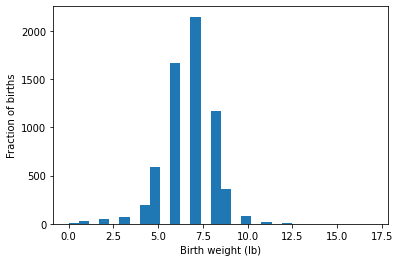

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


nsfg = pd.read_hdf("nsfg.hdf5", "nsfg")
birth_weight = nsfg['birthwgt_lb1']
birth_weight.replace([98, 99], np.nan, inplace=True)

plt.hist(birth_weight.dropna(), bins=30) # birth_weight.hist(bins=30, grid=False) ก็ใช้ได้
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()

# **Resampling**

The NSFG is not exactly representative of the U.S. population; by design, some groups are more likely to appear in the sample than others; they are **"oversampled"**. Oversampling helps to ensure that you have enough people in every subgroup to get reliable statistics, but it makes the analysis a little more complicated. However, we can correct for oversampling by `resampling`.

### Make a histogram
Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, 
* what values the variable can have
* how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable `'agecon'` that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the bins parameter that you saw in the video, and also a new parameter - `histtype`.

* Plot a histogram of `agecon` with `20` bins.
* Adapt your code to make an unfilled histogram by setting the parameter `histtype` to be `'step'`.

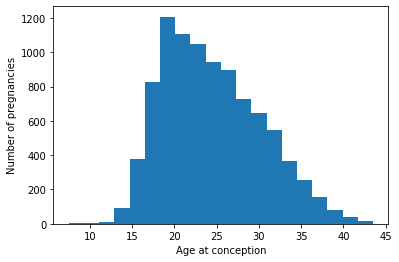

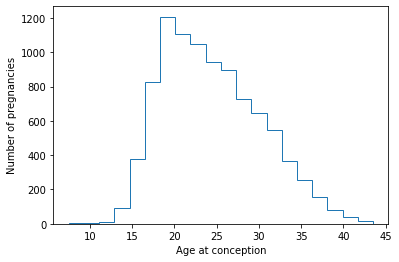

In [62]:
import pandas as pd
import numpy as np

nsfg = pd.read_hdf("nsfg.hdf5", "nsfg")

# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100

# Plot the histogram
plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

plt.hist(agecon, bins=20, histtype='step')
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')
plt.show()

### **Compute birth weight**
Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

A function, `resample_rows_weighted`, that takes the NSFG data and resamples it using the sampling weights in `wgt2013_2015`. The result is a sample that is representative of the U.S. population.

Then `birthwgt_lb1` and `birthwgt_oz1` are extracted. Replacing special codes with `NaN`, and compute total birth weight in pounds, `birth_weight`.



```
# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16
```

* Make a Boolean Series called `full_term` that is true for babies with `'prglngth'` greater than or equal to `37` weeks.
* Use `full_term` and `birth_weight` to select birth weight in pounds for full-term babies. Store the result in `full_term_weight`.
* Compute the mean weight of full-term babies.



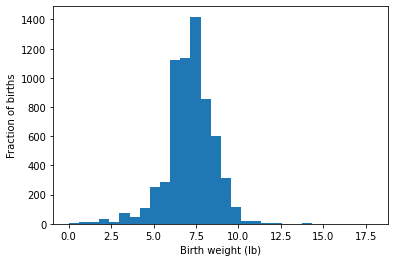


 7.392597951914515


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def resample_rows_weighted(df, column='finalwgt', seed=17):
    """Resamples a DataFrame using probabilities proportional to given column.

    df: DataFrame
    column: string column name to use as weights

    returns: DataFrame
    """
    np.random.seed(seed)
    weights = df[column] / sum(df[column])
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')
pounds = nsfg['birthwgt_lb1']
ounces = nsfg['birthwgt_oz1']

# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

plt.hist(birth_weight.dropna(), bins=30) # birth_weight.hist(bins=30, grid=False) ก็ใช้ได้
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()

# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print("\n", full_term_weight.mean())

### Filter
In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

* Use the variable `'nbrnaliv'` to make a Boolean Series that is `True` for single births (where `'nbrnaliv'` equals `1`) and `False` otherwise.
* Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
* For comparison, select multiple, full-term babies and compute their mean birth weight.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def resample_rows_weighted(df, column='finalwgt', seed=17):
    """Resamples a DataFrame using probabilities proportional to given column.

    df: DataFrame
    column: string column name to use as weights

    returns: DataFrame
    """
    np.random.seed(seed)
    weights = df[column] / sum(df[column])
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')
pounds = nsfg['birthwgt_lb1']
ounces = nsfg['birthwgt_oz1']

# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)
birth_weight = pounds + ounces/16

# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.40297320308299
Multiple full-term mean: 5.784722222222222


# **Probabilit Mass Function**




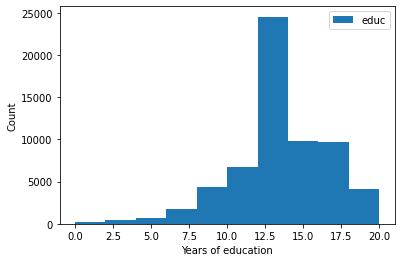

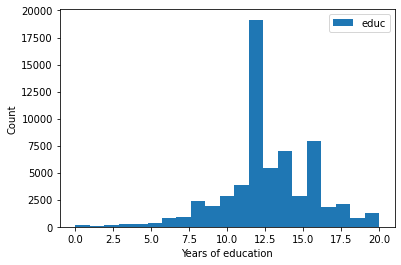

0.0    144
1.0     38
2.0    151
3.0    246
4.0    290
Name: , dtype: int64
19145
0.0    0.002311
1.0    0.000610
2.0    0.002424
3.0    0.003948
4.0    0.004655
Name: , dtype: float64
0.3072836414997432


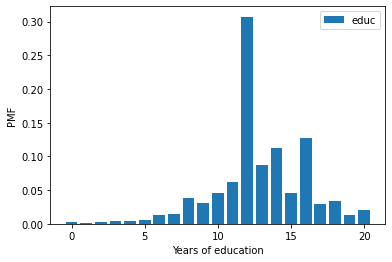

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from empiricaldist import Pmf

gss = pd.read_hdf('gss.hdf5', 'gss')
educ = gss['educ']

# Without using bins
plt.hist(educ.dropna(), label='educ')
plt.xlabel('Years of education')
plt.ylabel('Count')
plt.legend()
plt.show()

# Adjusting the number of bins yields more similar figure to PMF
plt.hist(educ.dropna(), label='educ', bins=21)
plt.xlabel('Years of education')
plt.ylabel('Count')
plt.legend()
plt.show()

pmf_educ = Pmf.from_seq(educ, normalize=False)
print(pmf_educ.head(5))
print(pmf_educ[12])

pmf_educ = Pmf.from_seq(educ, normalize=True)
print(pmf_educ.head(5))
print(pmf_educ[12])

pmf_educ.bar(label='educ')
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.legend()
plt.show()

In [113]:
gss["educ"].value_counts().sort_index()

0.0       144
1.0        38
2.0       151
3.0       246
4.0       290
5.0       379
6.0       842
7.0       860
8.0      2421
9.0      1963
10.0     2819
11.0     3864
12.0    19145
13.0     5405
14.0     6980
15.0     2836
16.0     7953
17.0     1791
18.0     2109
19.0      774
20.0     1294
Name: educ, dtype: int64

In [7]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.2-py3-none-any.whl size=10737 sha256=fcbe1cc27f6395a285a03af4167e90588fd5d30275a8d5c9497dafaf33a2c89c
  Stored in directory: /root/.cache/pip/wheels/34/22/5f/9ba9db604d08670e283b2e04551dd407f44cf889fdb9617ce5
Successfully built empiricaldist


### **Make a PMF**

You'll focus on one variable in this dataset, `'year'`, which represents the year each respondent was interviewed.

The `Pmf` class you saw in the video has already been created for you. You can access it outside of DataCamp via the empiricaldist library.

* Make a PMF for `year` with `normalize=False` and display the result.

In [89]:
from empiricaldist import Pmf
import pandas as pd
import matplotlib.pyplot as plt

gss = pd.read_hdf('gss.hdf5', 'gss')

# Compute the PMF for year
pmf_year = Pmf.from_seq(gss["year"], normalize=False)

# Print the result
print(pmf_year)

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: , dtype: int64


Exactly similar results comes from `.value_counts().sort_index()`

In [97]:
print(gss["year"].value_counts().sort_index(), "\n")
print(gss["year"].value_counts().sort_index().equals(pmf_year))

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: year, dtype: int64 

True


### Plot a PMF

Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable `'age'` contains respondents' age in years.

* Select the `'age'` column from the gss DataFrame and store the result in age.
* Make a normalized PMF of `age`. Store the result in `pmf_age`.
* Plot `pmf_age` as a bar chart

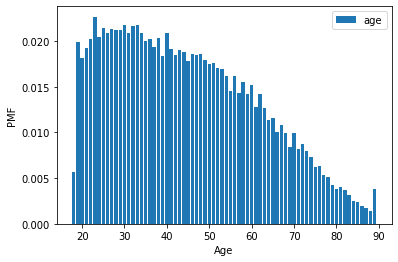

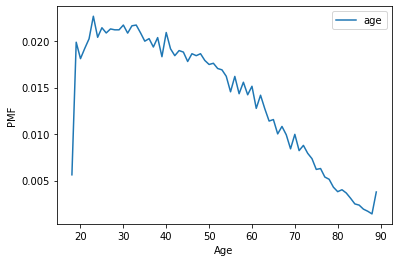

In [124]:
from empiricaldist import Pmf
import pandas as pd
import matplotlib.pyplot as plt

gss = pd.read_hdf('gss.hdf5', 'gss')

# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf.from_seq(age)

# Plot the PMF
pmf_age.bar(label="age")

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.legend()
plt.show()


# You could also use pmf_age.plot() to plot the Pmf as a line plot.

pmf_age.plot(label="age")

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.legend()
plt.show()

# **Cumulative Distribution Function**



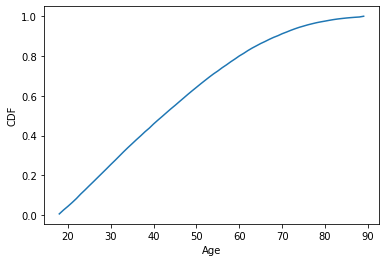

In [3]:
from empiricaldist import Cdf
import pandas as pd
import matplotlib.pyplot as plt

gss = pd.read_hdf('gss.hdf5', 'gss')

cdf = Cdf.from_seq(gss['age'])
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

## **Evaluating the CDF**

* CDF gives a probability of the random variables being less than some values in its range.

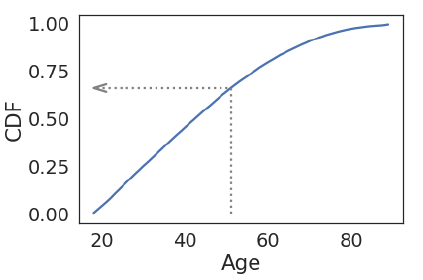

In [4]:
q = 51
p = cdf(q)
print(p)

0.6602013455146835


## **Evaluating the inverse CDF**

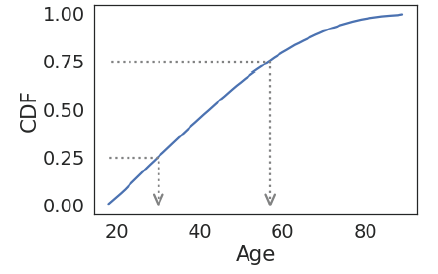

In [5]:
p = 0.25
q = cdf.inverse(p)
print(q)

p = 0.75
q = cdf.inverse(p)
print(q)

30.0
57.0


### **Make a CDF**

In this exercise, you'll make a CDF and use it to determine the fraction of respondents in the GSS dataset who are OLDER than `30`.

* Select the `'age'` column. Store the result in `age`.
* Compute the CDF of age. Store the result in `cdf_age`
* Calculate the CDF of `30`

In [7]:
from empiricaldist import Cdf
import pandas as pd
import matplotlib.pyplot as plt

gss = pd.read_hdf('gss.hdf5', 'gss')

# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf.from_seq(age)

# Calculate the CDF of 30
print(cdf_age(30))

0.2539137136526389


### **Compute IQR**

Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the `'realinc'` column, and the CDF of income has already been computed and stored in `cdf_income`.

* Calculate the 25th and 75th percentiles of income and store them in percentile_25th and percentile_75th, respectively.

* Calculate the interquartile range of income. Store the result in `iqr`.

* 

In [8]:
from empiricaldist import Cdf
import pandas as pd
import matplotlib.pyplot as plt

gss = pd.read_hdf('gss.hdf5', 'gss')
cdf_income = Cdf.from_seq(gss['realinc'])

# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0


### **Plot a CDF**
The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.

In the GSS dataset, the variable `'realinc'` represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF.

* Select `'realinc'` from the gss dataset.
* Make a Cdf object called `cdf_income`.
* Create a plot of `cdf_income` using `.plot()`.

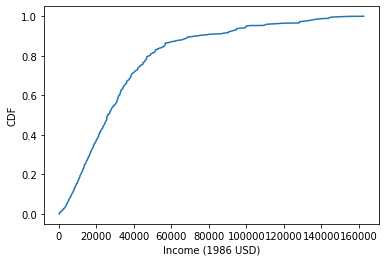

In [9]:
from empiricaldist import Cdf
import pandas as pd
import matplotlib.pyplot as plt

gss = pd.read_hdf('gss.hdf5', 'gss')
cdf_income = Cdf.from_seq(gss['realinc'])

cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

# **Comparing distributions**

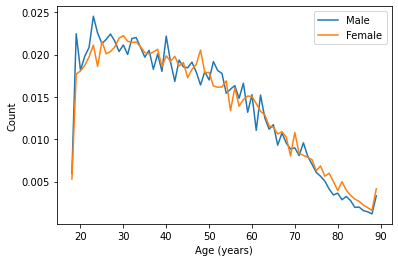

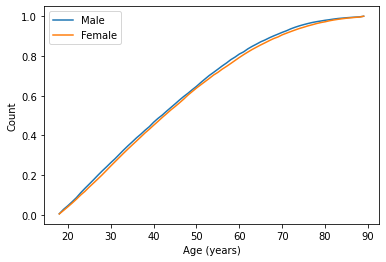

In [13]:
from empiricaldist import Pmf, Cdf
import pandas as pd
import matplotlib.pyplot as plt

gss = pd.read_hdf('gss.hdf5', 'gss')

male = gss['sex'] == 1
age = gss['age']
male_age = age[male]
female_age = age[~male]
Pmf.from_seq(male_age).plot(label='Male')
Pmf.from_seq(female_age).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend()
plt.show()

Cdf.from_seq(male_age).plot(label='Male')
Cdf.from_seq(female_age).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend()
plt.show()

จาก cdf จะเห็นว่าเส้นของผู้ชายอยู่ทางซ้ายมือของเส้นของผู้หญิง เราสามารถแปลผลได้ว่า
* ผู้ชายอายุน้อยกว่าผู้หญิงที่เปอร์เซ็นไทล์เดียวกัน (มองโดยยึดค่าเปอร์เซ็นไทล์จากแกนตั้งเป็นหลัก)
* อัตราส่วนของผู้ชายที่น้อยกว่าอายุหนึ่งๆมีมากกว่าอัตราส่วนของผู้หญิงที่อายุเท่ากัน (มองโดยยึดค่า อายุ ตามแกนนอนเป็นหลัก)

## **Income Distribution**

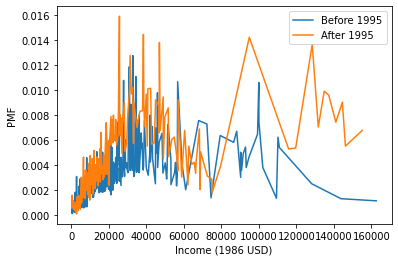

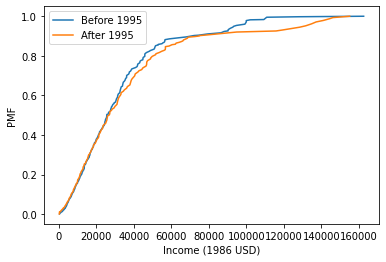

In [14]:
from empiricaldist import Pmf, Cdf
import pandas as pd
import matplotlib.pyplot as plt

gss = pd.read_hdf('gss.hdf5', 'gss')

income = gss['realinc']
pre95 = gss['year'] < 1995
Pmf.from_seq(income[pre95]).plot(label='Before 1995')
Pmf.from_seq(income[~pre95]).plot(label='After 1995')
plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.legend()
plt.show()

Cdf.from_seq(income[pre95]).plot(label='Before 1995')
Cdf.from_seq(income[~pre95]).plot(label='After 1995')
plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.legend()
plt.show()

จากรูปจะเห็นว่า ใช้ pmf เปรียบเทียบการกระจายของข้อมูลได้ยาก จาก cdf เราสามารถแปลผลได้ว่า

* ณ ระดับเปอร์เซ็นไทล์ใดๆก็ตาม กลุ่มครัวเรือนก่อนปี 1995 มีรายได้ต่อครัวเรือนที่น้อยกว่าหลังปี 1995
* อัตราส่วนของตรัวเรือนที่น้อยกว่ารายได้ใดๆในช่วงก่อนปี 1995 มีอัตราส่วนที่มากกว่าหลังปี 1995
* นั่นหมายความว่า คนรวยขึ้น

### **Distribution of education**

Let's begin comparing incomes for different levels of education in the GSS dataset, which has been pre-loaded for you into a DataFrame called `gss`. The variable `educ` represents the respondent's years of education.

What fraction of respondents report that they have 12 years of education or fewer?

In [15]:
from empiricaldist import Cdf
import pandas as pd

gss = pd.read_hdf('gss.hdf5', 'gss')
print(Cdf.from_seq(gss["educ"])[12])

0.5322611710323575


Approximately 53%  report that they have 12 years of education or fewer.

### **Extract education levels**

Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

* Identify respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
* Identify respondents with 12 or fewer years of education.
* Confirm that the mean of `high` is the fraction we computed in the previous exercise, about 53%.

In [16]:
from empiricaldist import Cdf
import pandas as pd

gss = pd.read_hdf('gss.hdf5', 'gss')

# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = ((educ < 16) & (educ >= 14))

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5308807991547402


### **Plot income CDFs**

Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. 




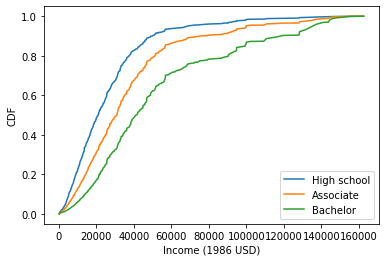

In [18]:
from empiricaldist import Cdf
import pandas as pd

gss = pd.read_hdf('gss.hdf5', 'gss')
educ = gss['educ']
bach = (educ >= 16)
assc = ((educ < 16) & (educ >= 14))
high = (educ <= 12)

income = gss['realinc']

# Plot the CDFs
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

People with more education have higher incomes.

# **The Normal Distributions**

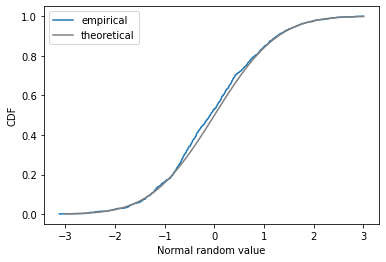

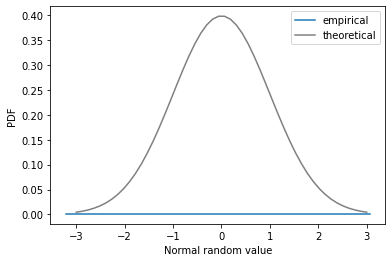

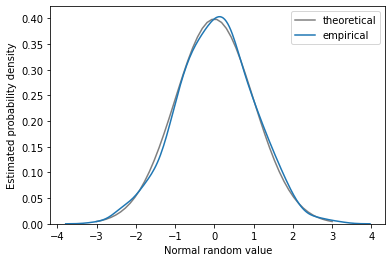

In [32]:
from empiricaldist import Pmf, Cdf
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Cdf.from_seq(np.random.normal(size=1000)).plot(label='empirical')
xs = np.linspace(-3, 3)
ys = norm(0, 1).cdf(xs)
plt.plot(xs, ys, color='grey', label='theoretical')
plt.xlabel("Normal random value")
plt.ylabel("CDF")
plt.legend()
plt.show()

Pmf.from_seq(np.random.normal(size=1000)).plot(label='empirical')
ys = norm(0, 1).pdf(xs)
plt.plot(xs, ys, color='gray', label="theoretical")
plt.xlabel("Normal random value")
plt.ylabel("PDF")
plt.legend()
plt.show()

ys = norm.pdf(xs)
plt.plot(xs, ys, color='gray', label="theoretical")
sns.kdeplot(np.random.normal(size=1000), label="empirical")
plt.xlabel("Normal random value")
plt.ylabel("Estimated probability density")
plt.legend()
plt.show()

* The CDF from the sample is pretty close to the normal CDF over the whole range. We would conclude that the normal distribution is a good model for the data.

* Unfortunately, if we compare this PDF to the PMF of the sample, it doesn't work very well. The PMF of the sample is a flat line across the bottom. In the random sample, every value is unique, so they all have the same probability, one in 1000. 

ต้องใช้ seaborn ในการ plot pdf ของ sample

## Use CDF for exploration.
## Use PMF if there are a small number of unique values.
## Use KDE if there are a lot of values.

### **Distribution of income**

In many datasets, the distribution of income is approximately ***lognormal***, which means that the <ins>logarithms</ins> of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's `np.log10()` function.

Then, you'll use the computed mean and standard deviation to make a norm object using the `scipy.stats.norm()` function.

* Extract `'realinc'` from `gss` and compute its logarithm using `np.log10()`.
* Compute the mean and standard deviation of the result.
* Make a `norm` object by passing the computed mean and standard deviation to `norm()`.

In [34]:
from empiricaldist import Pmf, Cdf
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

gss = pd.read_hdf('gss.hdf5', 'gss')

# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
dist = norm(mean, std)

4.371148677933652 0.4290082383271419


### **Comparing CDFs**

To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. These variables are from the previous exercise.

It provides `.cdf()`, which evaluates the normal cumulative distribution function.

* Evaluate the normal cumulative distribution function using `dist.cdf`.
* Use the `Cdf()` function to compute the CDF of `log_income`.
* Plot the result.

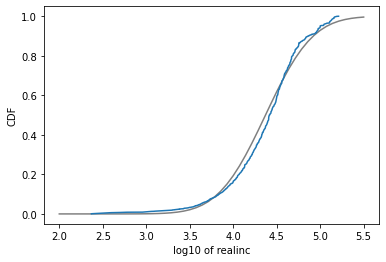

In [37]:
from empiricaldist import Pmf, Cdf
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

gss = pd.read_hdf('gss.hdf5', 'gss')
income = gss['realinc']
log_income = np.log10(income)
mean = log_income.mean()
std = log_income.std()
dist = norm(mean, std)

# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

### **Comparing PDFs**

In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. 

As before, the norm object dist is available in your workspace:
```
from scipy.stats import norm
dist = norm(mean, std)
```

Just as all `norm` objects have a `.cdf()` method, they also have a `.pdf()` method.

To create a `KDE` plot, you can use Seaborn's `kdeplot()` function. 

* Evaluate the normal PDF using `dist`, which is a norm object with the same mean and standard deviation as the data.
* Make a KDE plot of the logarithms of the incomes, using `log_income`, which is a Series object.

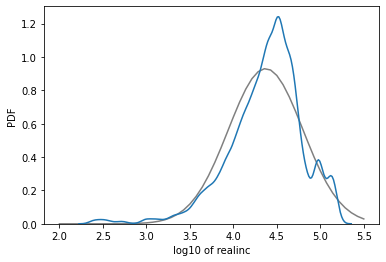

In [38]:
from empiricaldist import Pmf, Cdf
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

gss = pd.read_hdf('gss.hdf5', 'gss')
income = gss['realinc']
log_income = np.log10(income)
mean = log_income.mean()
std = log_income.std()
dist = norm(mean, std)

# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

# **Scatter Plot**

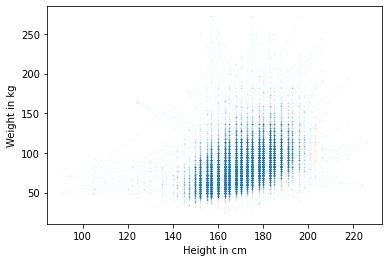

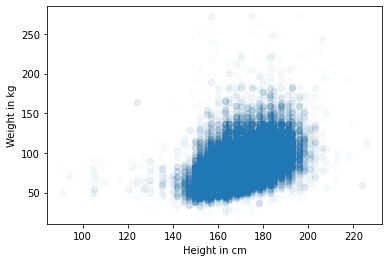

In [61]:
brfss = pd.read_hdf('brfss.hdf5', 'brfss')
height = brfss['HTM4']
weight = brfss['WTKG3']

# เห็นเค้าบอกว่า แบบนี้เร็วกว่า
plt.plot(height, weight, marker='o', alpha=0.02, markersize=1)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

plt.scatter(height, weight, alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

มันมีปัญหาว่า ค่าข้อมูลมันซ้อนทับกันจนดูไม่รู้เรื่อง

# **Jittering**

เป็นการเพิ่ม noise เข้าไปในข้อมูล เพื่อให้กราฟดูง่ายขึ้น

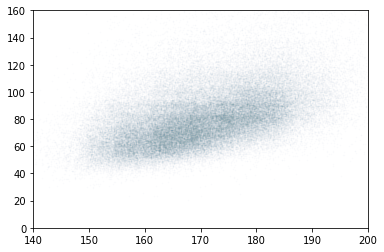

In [60]:
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)
plt.axis([140, 200, 0, 160])
plt.show()

### **PMF of age**

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a `.bar()` method to make a bar chart.

The BRFSS dataset includes a variable, `'AGE'` (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. `'AGE'` contains the midpoint of the bins.

* Extract the variable `'AGE'` from the DataFrame `brfss` and assign it to `age`.
* Get the PMF of `age` and plot it as a bar chart.

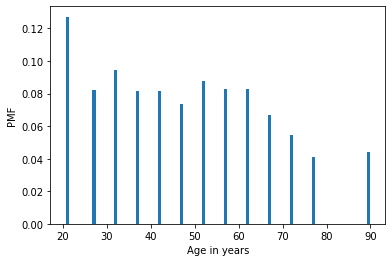

In [45]:
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
import pandas as pd

brfss = pd.read_hdf('brfss.hdf5', 'brfss')

# Extract age
age = brfss["AGE"]

# Plot the PMF
pmf_age = Pmf.from_seq(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

### **Scatter plot**

Make a scatter plot of `weight` and `age` with format string `'o'` and `alpha=0.1`.


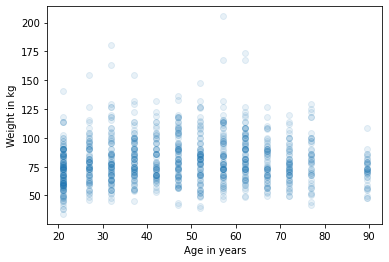

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

brfss = pd.read_hdf('brfss.hdf5', 'brfss')

# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

### **Jittering** ในข้อนี้ ไม่ต้อง jitter ทั้งสองตัวแปร เพราะมีแค่ตัวแปร age ที่โดนแปลงเป็นช่วง
In the previous exercise, the ages fall in columns because *they've been rounded into 5-year bins.* If we jitter them, the scatter plot will show the relationship more clearly. Recall how to jitter height and weight:

```
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
```
* Add random noise to `age` with mean `0` and standard deviation `2.5`.
* Make a scatter plot between `weight` and `age` with marker size `5` and `alpha=0.2`. Be sure to also specify `'o'`.



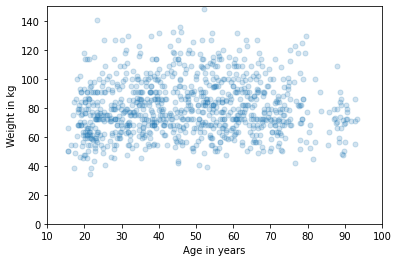

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

brfss = pd.read_hdf('brfss.hdf5', 'brfss')

# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight,'o', markersize=5, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.axis([10, 100, 0, 150])
plt.show()

In this case the nature of the relationship is still hard to see. In the next lesson, we'll see some other ways to visualize it.

# **Violin Plot**

เหมือนการพล็อต KDE กับค่าข้อมูลใแต่ละกลุ่ม

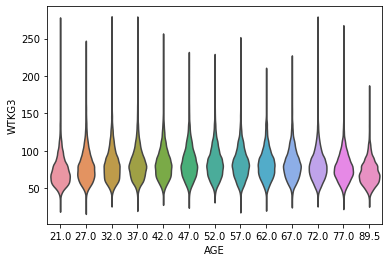

In [5]:
import seaborn as sns
import pandas as pd

brfss = pd.read_hdf('brfss.hdf5', 'brfss')

data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.show()

# **Box Plot**

* `whis` คือ Proportion of the IQR past the low and high quartiles to extend the plot whiskers. Points outside this range will be identified as outliers. ถ้าไม่เซ็ตค่า whis จะเป็นการพล็อต outliers ทั้งหมด

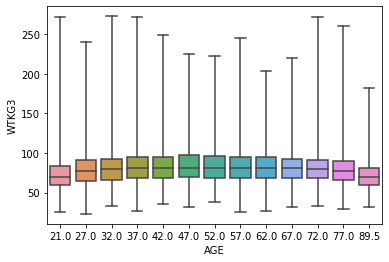

In [73]:
import seaborn as sns
import pandas as pd

brfss = pd.read_hdf('brfss.hdf5', 'brfss')

sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()

# **Log scale Box Plot**

จากรูปด้านบน จะเห็นว่า การกระจายค่าของข้อมูลในแต่ละช่วงค่อนข้างจะมีความเบ้อยู่มาก กล่าวคือ คนที่หนักที่สุดในแต่ละช่วงอายุนั้น อยู่ห่างจากค่ามัธยฐานไปมาก เมื่อเทียบกับคนที่เบาที่สุด

* ใช้ Log Scale Box Plot ในการแก้ไข

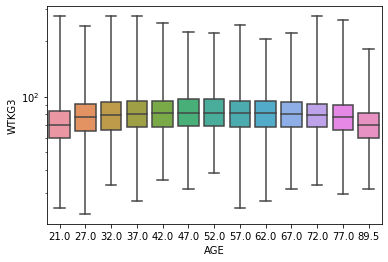

In [71]:
import seaborn as sns
import pandas as pd

brfss = pd.read_hdf('brfss.hdf5', 'brfss')

sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()

### **Height and weight**

Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The `brfss` DataFrame contains a variable `'_HTMG10'` that represents height in centimeters, binned into 10 cm groups.

* Use `sns.boxplot()` to plot the distribution of weight (`'WTKG3'`) in each height (`'_HTMG10'`) group. Specify `whis=10`.
* Add a line to plot the y-axis on a logarithmic scale.

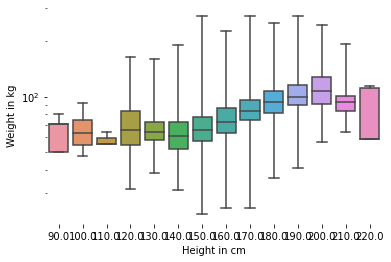

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

brfss = pd.read_hdf('brfss.hdf5', 'brfss')

# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


### **Distribution of income**

In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a <ins>categorical</ins> variable; that is, respondents are assigned to one of 8 income categories. The variable name is `'INCOME2'`. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all `Pmf` objects have a `.bar()` method.

* Extract `'INCOME2'` from the `brfss` DataFrame and assign it to `income`.
* Plot the PMF of `income` as a bar chart.

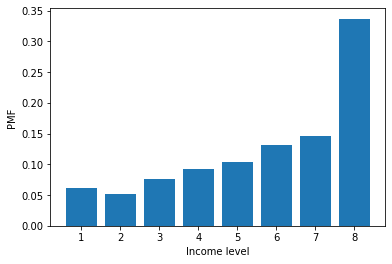

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from empiricaldist import Pmf

brfss = pd.read_hdf('brfss.hdf5', 'brfss')

# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

Almost half of the respondents are in the top income category, so this dataset doesn't distinguish between the highest incomes and the median. 

### **Income and height**

Let's now use a violin plot to visualize the relationship between income and height.

* Create a violin plot to plot the distribution of height (`'HTM4'`) in each income (`'INCOME2'`) group. Specify `inner=None` to simplify the plot.


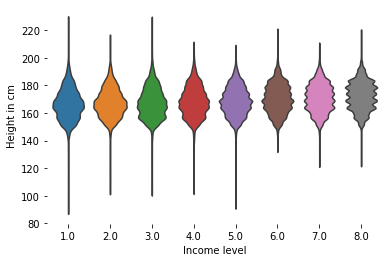

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

brfss = pd.read_hdf('brfss.hdf5', 'brfss')

# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None )

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


It looks like there is a weak positive relationsip between income and height.

# **Correlation**

* สัมประสิทธิ์สหสัมพันธ์ แสดงเฉพาะความสัมพันธ์เชิงเส้น ถ้าไม่เป็นความสัมพันธ์เชิงเส้น (อาทิ ยกกำลังสอง) ก็จะมีค่าสัมประสิทธิ์สหสัมพันธ์ที่ต่ำได้

           HTM4     WTKG3       AGE
HTM4   1.000000  0.474203 -0.093684
WTKG3  0.474203  1.000000  0.021641
AGE   -0.093684  0.021641  1.000000 


[[ 1.         -0.01651233]
 [-0.01651233  1.        ]]


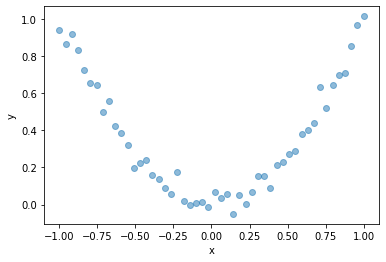

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal

brfss = pd.read_hdf('brfss.hdf5', 'brfss')

columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]
print(subset.corr(), "\n\n")

# ความสัมพันธ์ที่ไม่เป็นเชิงเส้นจะให้ค่าสัมประสิทธิ์สหสัมพันธ์ที่ต่ำ
xs = np.linspace(-1, 1)
ys = xs**2
ys += normal(0, 0.05, len(xs))
print(np.corrcoef(xs, ys)) # This correlation is close to zero
plt.plot(xs, ys, 'o', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### **Computing correlations**

The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable `'_VEGESU1'` represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

* From the `brfss` DataFrame, select the columns `'AGE'`, `'INCOME2'`, and `'_VEGESU1'`.
* Compute the correlation matrix for these variables.

In [16]:
import pandas as pd

brfss = pd.read_hdf('brfss.hdf5', 'brfss')

# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


### **Interpreting correlations**
Above, the correlation between income and vegetable consumption is about 0.12. The correlation between age and vegetable consumption is about -0.01.

Which of the following are correct interpretations of these results:

* A: People with higher incomes eat more vegetables.
* B: The relationship between income and vegetable consumption is linear.
* C: Older people eat more vegetables.
* D: There could be a strong nonlinear relationship between age and vegetable consumption.

The answer is A and D only.

The correlation between income and vegetable consumption is small, but it suggests that there is a relationship. But a correlation close to 0 does mean there is no relationship.

# **Simple Linear Regression**

LinregressResult(slope=0.007884071737997893, intercept=0.36513410086457937, rvalue=0.015268178746047566, pvalue=0.9161871817595406, stderr=0.07452330145476613) 



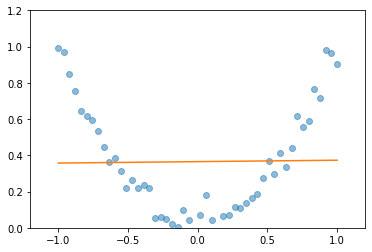

LinregressResult(slope=0.96580681852931, intercept=0.03005826586461474, rvalue=0.984776127535045, pvalue=3.900586104692591e-38, stderr=0.024606535367091023) 



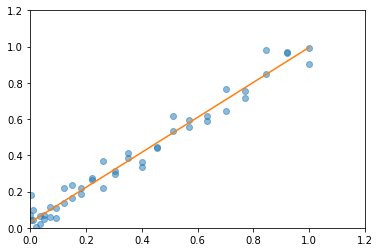

In [30]:
from scipy.stats import linregress
from numpy.random import normal
import numpy as np

xs = np.linspace(-1, 1)
ys = xs**2
ys += normal(0, 0.05, len(xs))

# Still cannot capture nonlinear relationship
res = linregress(xs, ys)
print(res, "\n")

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(xs, ys, 'o', alpha=0.5)
plt.plot(fx, fy, '-')
plt.axis([-1.2, 1.2, 0, 1.2])
plt.show()

# With nonlinear variable
res = linregress(xs**2, ys)
print(res, "\n")

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(xs**2, ys, 'o', alpha=0.5)
plt.plot(fx, fy, '-')
plt.axis([0, 1.2, 0, 1.2])
plt.show()


LinregressResult(slope=0.9192115381848305, intercept=-75.12704250330248, rvalue=0.4742030897902462, pvalue=0.0, stderr=0.005632863769802998)


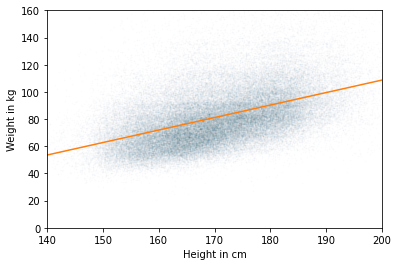

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import linregress

brfss = pd.read_hdf('brfss.hdf5', 'brfss')
height = brfss['HTM4']
weight = brfss['WTKG3']
height = height + np.random.normal(0, 2, size=len(brfss))
weight = weight + np.random.normal(0, 2, size=len(brfss))
plt.plot(height, weight, 'o', markersize=1, alpha=0.01)
plt.axis([140, 200, 0, 160])

subset = brfss.dropna(subset=['WTKG3', 'HTM4'])
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)
print(res)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

# **Nonlinear relationships**

LinregressResult(slope=0.023981159566968734, intercept=80.07977583683224, rvalue=0.02164143288906408, pvalue=4.374327493007456e-11, stderr=0.003638139410742185)


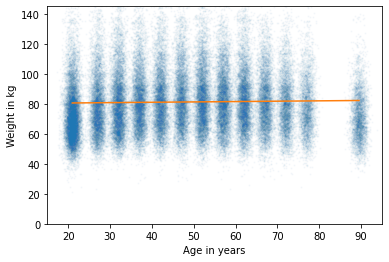

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import linregress

brfss = pd.read_hdf('brfss.hdf5', 'brfss')
age = brfss['AGE']+ np.random.normal(0, 1, size=len(brfss))
weight = brfss['WTKG3']+ np.random.normal(0, 2, size=len(brfss))

plt.plot(age, weight, 'o', markersize=1, alpha=0.03)
plt.axis([15, 95, 0, 145])

subset = brfss.dropna(subset=['WTKG3', 'AGE'])
xs = subset['AGE']
ys = subset['WTKG3']
res = linregress(xs, ys)
print(res)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

### **Income and vegetables**

As we saw in a previous exercise, the variable `'_VEGESU1'` represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

* Extract the columns `'INCOME2'` and `'_VEGESU1'` from subset into `xs` and `ys` respectively.
* Compute the simple linear regression of these variables.

In [47]:
from scipy.stats import linregress
import pandas as pd

brfss = pd.read_hdf('brfss.hdf5', 'brfss')

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332)


### **Fit a line**

Continuing from the previous exercise:

* Assume that `xs` and `ys` contain income codes and daily vegetable consumption, respectively, and

* `res` contains the results of a simple linear regression of `ys` onto `xs`.
* Set `fx` to the minimum and maximum of `xs`, stored in a NumPy array.
* Set `fy` to the points on the fitted line that correspond to the `fx`.


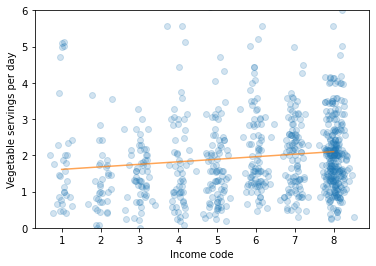

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import linregress

brfss = pd.read_hdf('brfss.hdf5', 'brfss')[:1000] # ในโจทย์เอามาแค่นี้ แต่เค้าไม่ได้บอก
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)

# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx 
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

# **Limit of simple regression**



LinregressResult(slope=0.07018276304675898, intercept=1.5271757214552815, rvalue=0.12245672250980064, pvalue=8.284807818575261e-27, stderr=0.0065225481798634926)


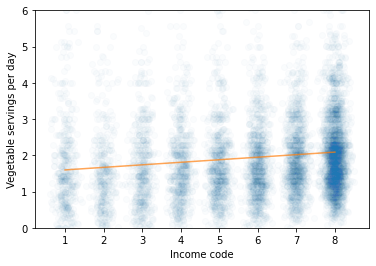

LinregressResult(slope=0.2136656956331503, intercept=5.443875546331134, rvalue=0.12245672250980064, pvalue=8.284807818575261e-27, stderr=0.01985736573555477)


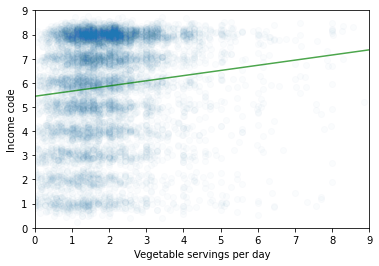

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import linregress

brfss = pd.read_hdf('brfss.hdf5', 'brfss')[:10000]
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)


# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.02)



# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx 
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

# Plot the other way around

ys = subset['INCOME2']
xs = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Plot the scatter plot
plt.clf()
y_jitter = ys + np.random.normal(0, 0.23, len(ys))
plt.plot(xs, y_jitter, 'o', alpha=0.02)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx 
plt.plot(fx, fy, '-', alpha=0.7, color='green')

plt.xlabel('Vegetable servings per day')
plt.ylabel('Income code')
plt.axis([0, 9, 0, 9])
plt.show()

 This example shows that regression is not symmetric.   If we use vegetable consumption to predict income, we see a big difference. But when we used income to predict vegetable consumption, we saw a small difference.

* ไม่สามารถบ่งบอก causation หรือ what causes what ได้

# **Linear Regression from Statsmodel Package**

In [74]:
import statsmodels.formula.api as smf
import pandas as pd

brfss = pd.read_hdf('brfss.hdf5', 'brfss')[:10000]

results = smf.ols('INCOME2 ~ _VEGESU1', data=brfss).fit()
results.params

Intercept    5.443876
_VEGESU1     0.213666
dtype: float64

### **Regression and causation**

In the BRFSS dataset, there is a strong relationship between vegetable consumption and income. The income of people who eat 8 servings of vegetables per day is double the income of people who eat none, on average.

Which of the following conclusions can we draw from this data?

* A. Eating a good diet leads to better health and higher income.

* B. People with higher income can afford a better diet.

* C. People with high income are more likely to be vegetarians.

This data is consistent with all of these conclusions, but it does not provide conclusive evidence for any of them.  So the answer is none of them.

### **Using StatsModels**
Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.

* Compute the regression of `'_VEGESU1'` as a function of `'INCOME2'` using SciPy's `linregress()`.
* Compute the regression of `'_VEGESU1'` as a function of `'INCOME2'` using StatsModels' `smf.ols()`.

In [80]:
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import linregress

brfss = pd.read_hdf('brfss.hdf5', 'brfss')

from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data=subset).fit()
print(results.params)

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


# **Multiple Regression**
## **Income and Education**




In [81]:
import pandas as pd
import statsmodels.formula.api as smf

gss = pd.read_hdf('gss.hdf5', 'gss')
results = smf.ols('realinc ~ educ', data=gss).fit()
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

## **Adding Age**



In [82]:
results = smf.ols('realinc ~ educ + age', data=gss).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

## **Income for each  age group**


18.0     350
19.0    1238
20.0    1128
21.0    1197
22.0    1261
        ... 
85.0     147
86.0     120
87.0     106
88.0      88
89.0     235
Name: age, Length: 72, dtype: int64 


age
18.0    36696.140255
19.0    33456.860419
20.0    26806.371609
21.0    27161.578191
22.0    27965.731410
            ...     
85.0    20792.064012
86.0    22539.024754
87.0    18200.485317
88.0    20555.524660
89.0    14068.617666
Name: realinc, Length: 72, dtype: float64 




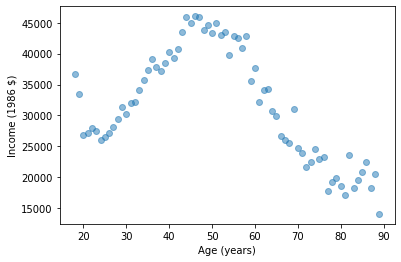

In [87]:
print(gss["age"].value_counts().sort_index(), "\n\n")
mean_income_by_age = gss.groupby("age")["realinc"].mean()
print(mean_income_by_age, "\n\n")

plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.show()

* Slope สำหรับตัวแปร age ต่ำมาก เพราะความสัมพันธ์เป็นแบบ nonlinear

* ถ้าเอาข้อมูลทั้งหมดมาพล็อตจะดูไม่รู้เรื่อง แบบนี้

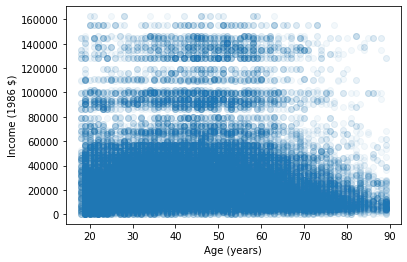

In [89]:
plt.plot(gss['age'], gss['realinc'], 'o', alpha=0.05)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.show()

## **Adding nonlinear terms**

In [90]:
gss['age2'] = gss['age']**2
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()
results.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

ความชันของค่าสัมประสิทธิ์หน้าตัวแปร `age2` เป็นลบ แปลว่า ความสัมพันธ์เป็นในรูปพาราโบลาคว่ำ

### **Plot income and education**

To get a closer look at the relationship between income and education, let's use the variable `'educ'` to group the data, then plot mean income in each group.

* Group `gss` by `'educ'`. Store the result in `grouped`.
* From grouped, extract `'realinc'` and compute the mean.
* Plot `mean_income_by_educ` as a scatter plot. Specify `'o'` and `alpha=0.5`.

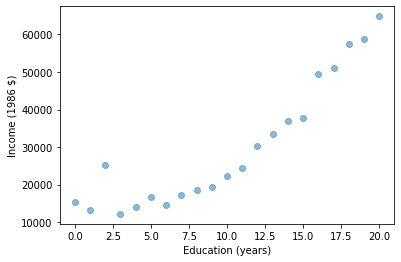

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

gss = pd.read_hdf('gss.hdf5', 'gss')

# Group by educ
grouped = gss.groupby("educ")

# Compute mean income in each group
mean_income_by_educ = grouped["realinc"]

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ.mean(), 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

It looks like the relationship between income and education is non-linear.

### **Non-linear model of education**

The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear model.

* Add a column named `'educ2'` to the `gss` DataFrame; it should contain the values from `'educ'` squared.
* Run a regression model that uses `'educ'`, `'educ2'`, `'age'`, and `'age2'` to predict `'realinc'`.

In [93]:
import statsmodels.formula.api as smf
import pandas as pd

gss = pd.read_hdf('gss.hdf5', 'gss')

# Add a new column with educ squared
gss['educ2'] = gss["educ"]**2   
gss['age2'] = gss["age"]**2   

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()
# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


The slope associated with `educ2` is positive, so the model curves upward.

# **Predictions**





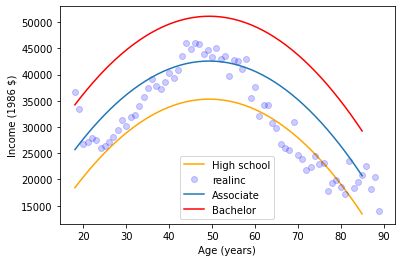

In [101]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd

gss = pd.read_hdf('gss.hdf5', 'gss')

# Add a new column with educ squared
gss['educ2'] = gss["educ"]**2   
gss['age2'] = gss["age"]**2   

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2
df['educ'] = 12 # Holding education constant at educ = 12
df['educ2'] = df['educ']**2
pred12 = results.predict(df)

plt.plot(df['age'], pred12, label='High school', color="orange") # predictions
plt.plot(mean_income_by_age, 'o', alpha=0.2, label="realinc", color="blue") # data

df['educ'] = 14  # Holding education constant at educ = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate')

df['educ'] = 16 # Holding education constant at educ = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor', color="red")


plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

### **Making predictions**

At this point, we have a model that predicts income using age, education, and sex.

Let's see what it predicts for different levels of education, holding `age` constant.

* Using `np.linspace()`, add a variable named `'educ'` to `df` with a range of values from `0` to `20`.
* Add a variable named `'age'` with the constant value `30`.
* Use `df` to generate predicted income as a function of education.

In [103]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd

gss = pd.read_hdf('gss.hdf5', 'gss')
gss['educ2'] = gss["educ"]**2   
gss['age2'] = gss["age"]**2 

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


### **Visualizing predictions**

* Plot `mean_income_by_educ` using circles (`'o'`). Specify an `alpha` of `0.5`.
* Plot the prediction results with a line, with `df['educ']` on the x-axis and `pred` on the y-axis.

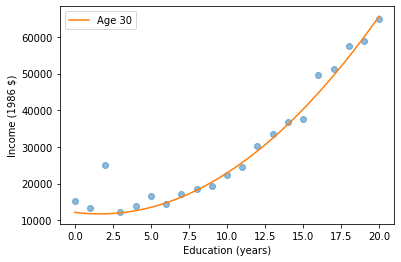

In [104]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd

gss = pd.read_hdf('gss.hdf5', 'gss')
gss['educ2'] = gss["educ"]**2   
gss['age2'] = gss["age"]**2 

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Plot mean income in each age group
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)


df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Plot the predictions
pred = results.predict(df)
plt.plot(df["educ"], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

# **Logistic Regression**

## **Sex and income**

In [108]:
import statsmodels.formula.api as smf
import pandas as pd

gss = pd.read_hdf('gss.hdf5', 'gss')
gss['educ2'] = gss["educ"]**2   
gss['age2'] = gss["age"]**2 

# C(sex) เป็นการบอกให้ทราบว่าตัวแปรนี้เป็นตัวแปร categorical
results = smf.ols('realinc ~ educ + educ2 + age + age2 + C(sex)', data=gss).fit() 
results.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

ตัวแปร `sex` มีค่าแค่ `1` กับ `2`

In [112]:
gss["sex"].value_counts()

2    33820
1    28646
Name: sex, dtype: int64

* ถ้าไม่ใส่ `C` ข้างหน้า `sex` จะทำให้ค่าจุดตัดแกนตั้งลดลงมา แต่ค่าสัมประสิทธิ์หน้าตัวแปร `sex` ยังคงเท่าเดิม


In [113]:
smf.ols('realinc ~ educ + educ2 + age + age2 + sex', data=gss).fit() .params

Intercept   -18213.339776
educ          -310.247419
educ2          150.514091
age           1703.047502
age2           -17.238711
sex          -4156.113865
dtype: float64

* สังเกตว่า การใส่ `C` ไว้ข้างหน้า เป็นแค่การเปลี่ยนจาก 1 เป็น 0 และเปลี่ยนจาก 2 เป็น 1 ซึ่งสามารถดูได้จาก ค่าสัมประสิทธิ์ของการรันโดยไม่ใส่ `C` บวกกับค่าสัมประสิทธิ์ของตัวแปร `sex` มีค่าเท่ากับค่าสัมประสิทธิ์ของการรันโดยใส่ `C` พอดี

In [111]:
-18213.339776 -4156.113865

-22369.453641

## **Binary dependent variable**
### ต้องใช้ logit แทน ols

In [115]:
import statsmodels.formula.api as smf
import pandas as pd

gss = pd.read_hdf('gss.hdf5', 'gss')
gss['educ2'] = gss["educ"]**2   
gss['age2'] = gss["age"]**2 

print(gss['gunlaw'].value_counts(),"\n\n")

gss['gunlaw'].replace([2], [0], inplace=True)

print(gss['gunlaw'].value_counts(),"\n\n")

smf.logit('gunlaw ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit().params

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64 


1.0    30918
0.0     9632
Name: gunlaw, dtype: int64 


Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

* The parameters are in the form of **"log odds"**. 
* Positive values are associated with things that make the outcome more likely 
* Negative values make the outcome less likely. 
  * For example, the parameter associated with `sex=2` is `0.75`, which indicates that women are more likely to support this form of gun control. 

## **Logit predict visualization**

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


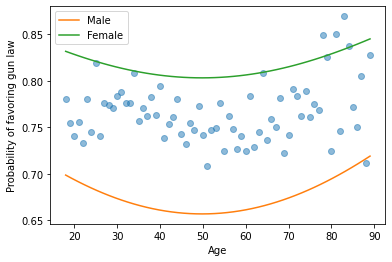

In [116]:
import statsmodels.formula.api as smf
import pandas as pd

gss = pd.read_hdf('gss.hdf5', 'gss')
gss['educ2'] = gss["educ"]**2   
gss['age2'] = gss["age"]**2 
gss['gunlaw'].replace([2], [0], inplace=True)

results = smf.logit('gunlaw ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()

df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['educ'] = 12 # ให้การศึกษาที่ 12 ปี
df['age2'] = df['age']**2
df['educ2'] = df['educ']**2

df['sex'] = 1 # 
pred1 = results.predict(df)
df['sex'] = 2
pred2 = results.predict(df)

favor_by_age = gss.groupby('age')['gunlaw'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)
plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')
plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()
plt.show()

* People near age 50 are least likely to support gun control
* Women are more likely to support it than men, by almost `15 `percentage points.

### **Predicting a binary variable**

Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable `grass` records the answer to the question "Do you think the use of marijuana should be made legal or not?"

* Fill in the parameters of `smf.logit()` to predict grass using the variables `age`, `age2`, `educ`, and `educ2`, along with `sex` as a categorical variable.
* Add a column called `educ` and set it to `12` years; then compute a second column, `educ2`, which is the square of `educ`.
* Generate separate predictions for men and women.
* Compute the mean of `'grass'` for each age group, and then use `plt.plot()` to plot `pred1` and `pred2` versus `df['age']` with the label `Male` and `'Female'`, respectivel.

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6
Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64


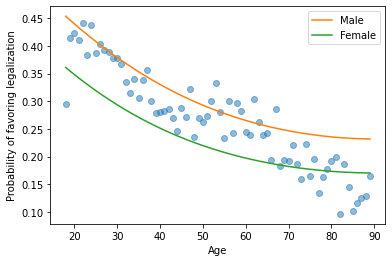

In [117]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd

gss = pd.read_hdf('gss.hdf5', 'gss')
gss['educ2'] = gss["educ"]**2   
gss['age2'] = gss["age"]**2 

# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
print(results.params)

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped["grass"].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()